In [8]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [9]:
image_data = nib.load('../../images/1/FLAIR.nii.gz')

In [10]:
image = image_data.get_fdata()

In [20]:
origin_x = 100
origin_y = 100
origin_z = 1
x = 1
y = 1
z = 1
valor_medio_cluster = image[origin_x, origin_y, 20]
tol = 50
segmentation = np.zeros_like(image)
itera = 1
point = [origin_x,origin_y]
tail = [point]
evaluated = image == True

while True:
  punto = tail.pop(0)

  print(len(tail))
  
  for dx in [-x, 0, x] :
    for dy in [-y, 0, y] :
      nuevoPunto = [punto[0]+dx, punto[1]+dy]
      if((nuevoPunto[0] < 230) and ((nuevoPunto[0]) > 0) and (nuevoPunto[1] < 230) and ((nuevoPunto[1]) > 0) ):
        if (not evaluated[nuevoPunto[0], nuevoPunto[1],20]):
          if np.abs(valor_medio_cluster - image[nuevoPunto[0], nuevoPunto[1], 20]) < tol :
              segmentation[nuevoPunto[0], nuevoPunto[1], 20] = 1
              tail.append([nuevoPunto[0], nuevoPunto[1]])
              evaluated[nuevoPunto[0], nuevoPunto[1], 20] = True
              evaluated[punto[0], punto[1], 20] = True
          else :
              segmentation[nuevoPunto[0], nuevoPunto[1], 20] = 0
              tail.append([nuevoPunto[0], nuevoPunto[1]])
              evaluated[nuevoPunto[0], nuevoPunto[1], 20] = True
              evaluated[punto[0], punto[1], 20] = True


  valor_medio_cluster = image[segmentation == 1].mean()

  

  # x += 1
  # y += 1
  # z += 1
  if len(tail) == 0:
    break
    




0
7
11
11
13
13
13
15
15
15
19
19
19
19
19
19
21
21
21
21
21
23
23
23
23
23
27
27
27
27
27
27
27
27
27
27
29
29
29
29
29
29
29
31
31
31
31
31
31
31
35
35
35
35
35
35
35
35
35
35
35
35
35
35
37
37
37
37
37
37
37
37
37
39
39
39
39
39
39
39
39
39
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
45
45
45
45
45
45
45
45
45
45
45
47
47
47
47
47
47
47
47
47
47
47
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
53
53
53
53
53
53
53
53
53
53
53
53
53
55
55
55
55
55
55
55
55
55
55
55
55
55
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
71
71
71
71
71
71
71
71
71
71
71
71
71
71
71
71
71
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
77
77
77
77
77
77
77
77
77
77


In [21]:
from collections import deque

def pointToString(point):
    str = "("
    for value in point:
        str += f"{value},"
    str += ")"
    return str

origin_x = 100
origin_y = 100
origin_z = 20
x = 1
y = 1
z = 1
valor_medio_cluster = image[origin_x, origin_y, 20]
tol = 50
segmentation = np.zeros_like(image)
itera = 1
point = [origin_x,origin_y, origin_z]
tail = deque([point])
visited = set()

while True:
    punto = tail.popleft()
    puntoStr = pointToString(punto)

    print(len(tail))
    

    for dz in [-z, 0, z]:
        for dy in [-y, 0, y]:
            for dx in [-x, 0, x]:
                nuevoPunto = [punto[0]+dx, punto[1]+dy, punto[2]+dz]
                nuevoPuntoStr = pointToString(nuevoPunto)
                
                if((nuevoPunto[0] < 230) and ((nuevoPunto[0]) > 0) and (nuevoPunto[1] < 230) and ((nuevoPunto[1]) > 0) and (nuevoPunto[2] < 50) and ((nuevoPunto[2]) > 0)):
                    if nuevoPuntoStr not in visited:
                        if np.abs(valor_medio_cluster - image[nuevoPunto[0], nuevoPunto[1], nuevoPunto[2]]) < tol :
                            segmentation[nuevoPunto[0], nuevoPunto[1], nuevoPunto[2]] = 1
                            tail.append(nuevoPunto)
                            visited.add(nuevoPuntoStr)
                        else :
                            segmentation[nuevoPunto[0], nuevoPunto[1], nuevoPunto[2]] = 0
                            tail.append(nuevoPunto)
                            visited.add(nuevoPuntoStr)

    visited.add(puntoStr)
    valor_medio_cluster = image[segmentation == 1].mean()

    if len(tail) == 0:
        break

0
26
44
48
56
60
60
62
70
72
74
78
78
80
80
79
79
81
81
81
89
91
93
95
95
95
97
97
97
115
119
123
127
127
127
131
131
131
135
135
135
135
135
139
139
139
139
139
143
143
143
143
143
151
153
155
157
157
157
159
159
159
163
163
163
163
163
163
165
165
165
173
175
177
179
179
179
181
181
181
183
183
183
185
185
185
189
189
189
189
189
189
191
191
191
191
191
193
193
193
193
193
201
203
205
207
207
207
209
209
209
211
211
211
213
213
213
215
215
215
215
215
217
217
217
217
217
235
239
243
247
247
247
251
251
251
255
255
255
255
255
259
259
259
259
259
263
263
263
263
263
267
267
267
267
267
271
271
271
271
271
271
271
275
275
275
275
275
275
275
279
279
279
279
279
279
279
279
279
283
283
283
283
283
283
283
283
283
287
287
287
287
287
287
287
287
287
295
297
299
301
301
301
303
303
303
305
305
305
307
307
307
309
309
309
309
309
311
311
311
311
311
315
315
315
315
315
315
315
315
315
315
317
317
317
317
317
325
327
329
331
331
331
333
333
333
335
335
335
337
337
337
339
339
339
339
339
34

KeyboardInterrupt: 

In [1]:
from queue import Queue

def region_growing(image, seed, threshold):

    # Initialize the segmentation
    segmentation = np.zeros_like(image)
    
    # Initialize the queue with the seed point
    q = Queue()
    q.put(seed)
    
    while not q.empty():
        # Get the next point from the queue
        x, y, z = q.get()
        
        # Check if the point is within the threshold
        if abs(image[x, y, z] - image[seed]) <= threshold:
            # Add the point to the segmentation
            segmentation[x, y, z] = 1
            
            # Add the neighbors to the queue
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    for dz in [-1, 0, 1]:
                        if dx == dy == dz == 0:
                            continue
                        
                        nx = x + dx
                        ny = y + dy
                        nz = z + dz
                        
                        if nx >= 0 and nx < image.shape[0] and ny >= 0 and ny < image.shape[1] and nz >= 0 and nz < image.shape[2]:
                            q.put((nx, ny, nz))
        print(q)
    
region_growing(image, seed=(100,100,20), threshold=20)

NameError: name 'image' is not defined

In [21]:
image.shape

(240, 240, 48)

In [22]:
print(segmentation[0:3, 0:3, 0:3])

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


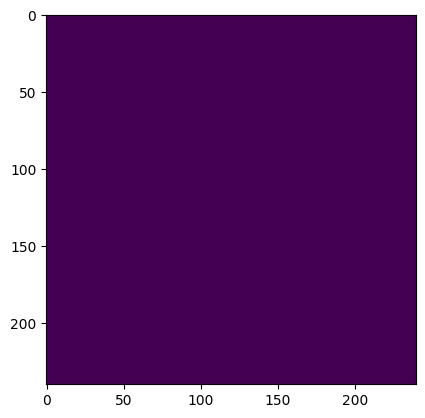

In [7]:
# plt.imshow(image[:, :, 100])
plt.imshow(segmentation[:, :, 20])